# Problem 1.2

The solar and wind generation in a country can be represented, respectively, by the sinusoidal wavesg gs(t) andg gw(t).

$$
  g_s(t) = C_s CF_s\left(1 + \sin\frac{2\pi}{24}t\right)
$$

$$
  g_s(t) = C_w CF_w\left(1 + 0.9 \Delta \sin\frac{2\pi}{168}t\right)
$$


Where CS and CW represent the installed capacity of solar and wind energy.

CFS=0.15 and CFW=0.25 represent the annual capacity factors for solar and wind andt  the hour throughout the year,i.e., t takes values from 0 to 8,759.  The country has a constant electricity load of 1 G

a)  Calculate the installed solar capacity that would be necessary to cover the electricity load, on average

b)  Calculate the installed wind capacity that would be necessary to cover the electricity load, on average

In [3]:
# Given parameters
CF_S = 0.15  # Capacity factor for solar
CF_W = 0.25 # Capacity factor for wind
required_load = 1  # GW

# Compute installed capacity needed to meet average load
C_S = required_load / CF_S 
C_W = required_load / CF_W

print(f"Required installed solar capacity: {C_S:.2f} GW")
print(f"Required installed wind capacity: {C_W:.2f} GW")



Required installed solar capacity: 6.67 GW
Required installed wind capacity: 4.00 GW


c)  Calculate the main characteristics of the ideal storage (power capacity,  energy capacity,  and chargetime) that balances the mismatch between solar generation and load in section (a)

In [5]:
import numpy as np
# Power capacity
print(f"Required installed storage {CF_S * C_S:.2f} GW")

# Energy capacity
print(f"Required energy capacity {(CF_S * C_S* 24)/np.pi} GWh")

# Charge time
print(f"Required charge time {24/np.pi} hours")

Required installed storage 1.00 GW
Required energy capacity 7.639437268410976 GWh
Required charge time 7.639437268410976 hours


d)  Calculate the main characteristics of the ideal storage (power capacity,  energy capacity,  and chargetime) that balances the mismatch between wind generation and load in section (b)

In [6]:
# Power capacity
print(f"Required installed storage {CF_W * C_W*0.9:.2f} GW")

# Energy capacity
print(f"Required energy capacity {(CF_S * C_S*0.9* 168)/np.pi} GWh")

# Charge time
print(f"Required charge time {168/np.pi} hours")

Required installed storage 0.90 GW
Required energy capacity 48.12845479098916 GWh
Required charge time 53.47606087887684 hours


# Problem 1.3

We define the mismatch ∆tas the difference in every hour, between the renewable generation and theload, that i
$$
    \Delta_t = g_s(t) + g_w(t) - d(t)
$$

The total backup energy EB that needs to be produced to ensure that demand is supplied every hourcan be calculated as the sum of negative mismatch value 

$$
    E_B = \sum_{t=0}^{8759} \Delta_t^-
$$

The capacity of the backup generationCBthat is needed to ensure that demand is supplied every hourcan be calculated as the maximum of the absolute value of the negative mismatch value

$$
C_B = \max|\Delta_t^-|
$$

The total curtailed energy can be calculated as the sum of positive mismatch values

$$
E_C = \sum_{t=0}^{8759} \Delta_t^+
$$

a)  Assume that the installed capacities for solar PV and wind power are those required to produce, on average, 50% of the annual electricity demand with every technology (i.e., the capacities are 0.5 times the values calculated in sections (a) and (b) in Problem 1.2). Calculate total backup energy EB, backupcapacity CB and curtailed energy EC

In [31]:
C_W =  0.5 * required_load / CF_W
C_S =  0.5 *required_load / CF_S

print(f"Installed solar capacity: {C_S:.2f} GW")
print(f"Installed wind capacity: {C_W:.2f} GW")

# Constant electricity demand (GW)
load = 1   

# Time vector (one year in hours)
t = np.arange(8760)  # 0 to 8759 hours

# Compute wind generation
g_W = C_W * CF_W * (1 + 0.9 * np.sin(2 * np.pi * t / 168))
# Compute solar generation
g_S = C_S * CF_S * (1 + np.sin(2 * np.pi * t / 24))

# Compute hourly mismatch (difference between generation and demand)
delta = g_W + g_S - load

print (f'total backup energy EB = {np.sum(delta[delta<0])} GWh')
print(f'backup capacity = {np.max(abs(delta[delta<0]))} GW')
print(f'curtailed energy = {np.sum(delta[delta>0])} GWh')

Installed solar capacity: 3.33 GW
Installed wind capacity: 2.00 GW
total backup energy EB = -1691.8662903925933 GWh
backup capacity = 0.9054359905560991 GW
curtailed energy = 1696.220063754806 GWh


b)  Assuming γ=1,  calculate  and  plot  the  total  backup  energy EB,  backup  capacity CB and  curtailed energy EC for α values ranging from 0 to 1.  Which combination of solar and wind generation (i.e.,whichαvalue) minimizes the required backup energy? Which combination of solar and wind generationminimizes the required backup capacity?

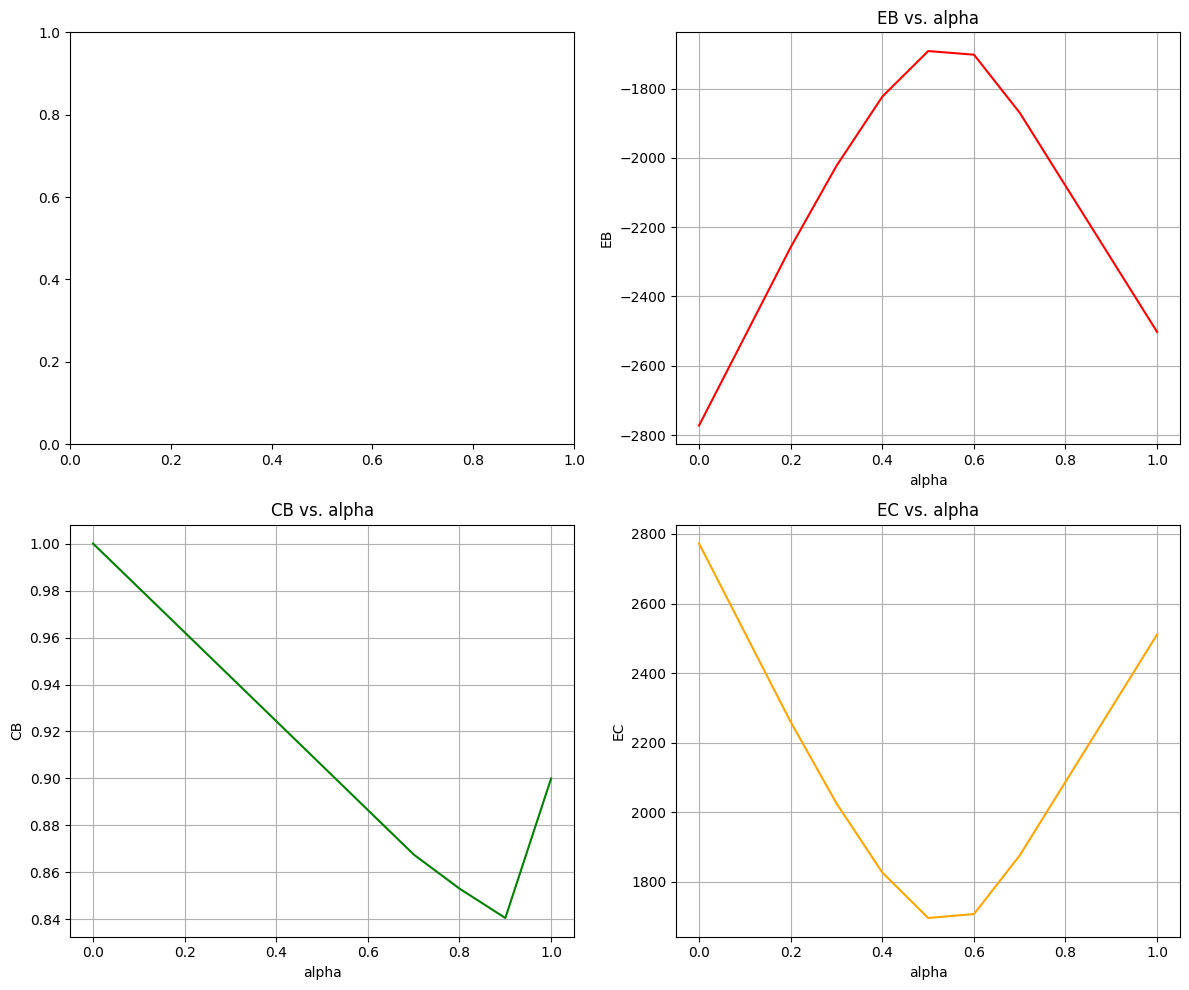

alpha value that minimizes the required backup energy = 0.5002483795996144
alpha value that minimizes the required backup capacity = 0.9000893811351403


In [64]:
gamma = (g_S.mean() + g_W.mean())/load
alpha = g_W.mean()/(g_S.mean()+g_W.mean())


# Initialize arrays to store results
alpha_values = np.zeros(11)
EB_values = np.zeros(11)
CB_values = np.zeros(11)
EC_values = np.zeros(11)


for i in range (0, 11):
    C_W =  i/10 * required_load / CF_W
    C_S =  (10-i)/10 *required_load / CF_S
    g_W = C_W * CF_W * (1 + 0.9 * np.sin(2 * np.pi * t / 168))
    g_S = C_S * CF_S * (1 + np.sin(2 * np.pi * t / 24))
    alpha_values[i] = g_W.mean()/(g_S.mean()+g_W.mean())

    delta = g_W + g_S - load
    EB_values[i] = np.sum(delta[delta<0])
    CB_values[i] = np.max(abs(delta[delta<0]))
    EC_values[i] = np.sum(delta[delta>0])


# Plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot EB values
ax[0, 1].plot(alpha_values, EB_values, label='EB', color='red')
ax[0, 1].set_title('EB vs. alpha')
ax[0, 1].set_xlabel('alpha')
ax[0, 1].set_ylabel('EB')
ax[0, 1].grid(True)

# Plot CB values
ax[1, 0].plot(alpha_values, CB_values, label='CB', color='green')
ax[1, 0].set_title('CB vs. alpha')
ax[1, 0].set_xlabel('alpha')
ax[1, 0].set_ylabel('CB')
ax[1, 0].grid(True)

# Plot EC values
ax[1, 1].plot(alpha_values, EC_values, label='EC', color='orange')
ax[1, 1].set_title('EC vs. alpha')
ax[1, 1].set_xlabel('alpha')
ax[1, 1].set_ylabel('EC')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

#  Which combination of solar and wind generation (i.e.,whichαvalue) minimizes the required backup energy? Which combination of solar and wind generationminimizes the required backup capacity

print(f'alpha value that minimizes the required backup energy = {alpha_values[np.argmax(EB_values)]}')
print(f'alpha value that minimizes the required backup capacity = {alpha_values[np.argmin(CB_values)]}')

c)  Calculate and plot the backup energy EB, backup capacity CB and curtailed energy EC for α values ranging from 0 to 1 and γ values ranging from 0 to 1 and discuss the results

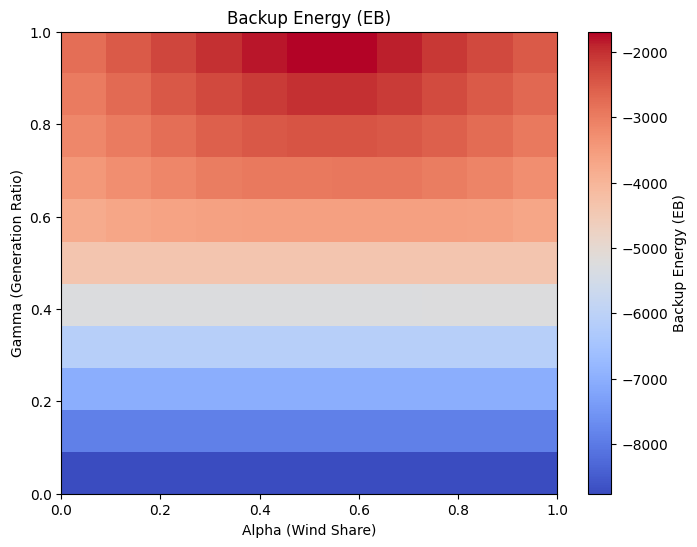

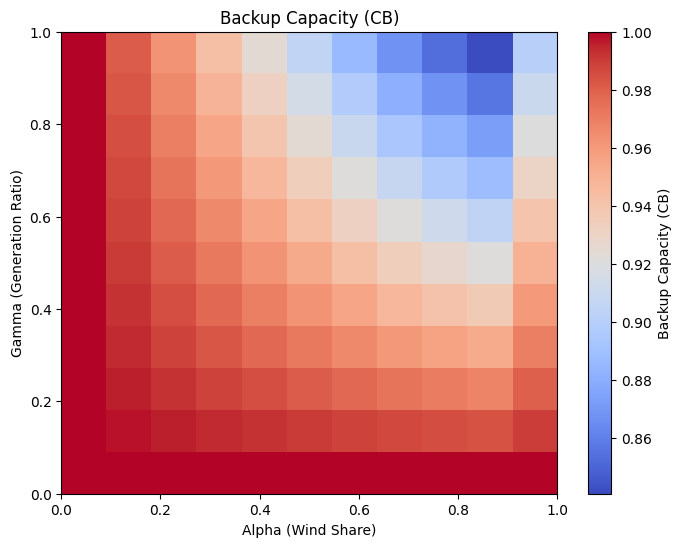

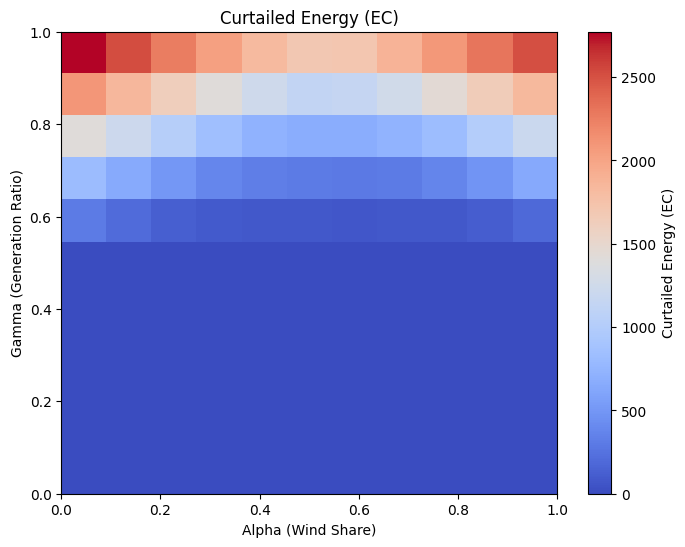

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid resolution
alpha_range = np.linspace(0, 1, 11)  # 11 points from 0 to 1
gamma_range = np.linspace(0, 1, 11)  # 11 points from 0 to 1

# Initialize matrices to store results
EB_matrix = np.zeros((len(gamma_range), len(alpha_range)))
CB_matrix = np.zeros((len(gamma_range), len(alpha_range)))
EC_matrix = np.zeros((len(gamma_range), len(alpha_range)))

# Loop over gamma values
for gi, gamma in enumerate(gamma_range):
    for ai, alpha in enumerate(alpha_range):
        # Calculate g_W.mean() and g_S.mean() based on alpha and gamma
        total_generation = gamma * load  # Total generation defined by gamma
        g_W_mean = alpha * total_generation  # Wind generation fraction
        g_S_mean = (1 - alpha) * total_generation  # Solar generation fraction

        # Compute capacity factors
        C_W = g_W_mean / CF_W
        C_S = g_S_mean / CF_S

        # Generate time-dependent profiles
        g_W = C_W * CF_W * (1 + 0.9 * np.sin(2 * np.pi * t / 168))
        g_S = C_S * CF_S * (1 + np.sin(2 * np.pi * t / 24))

        # Compute imbalance
        delta = g_W + g_S - load

        # Backup energy (when generation is less than demand)
        EB = np.sum(delta[delta < 0])
        CB = np.max(abs(delta[delta < 0]))  # Maximum backup needed
        EC = np.sum(delta[delta > 0])  # Curtailed energy when generation exceeds demand

        # Store results
        EB_matrix[gi, ai] = EB
        CB_matrix[gi, ai] = CB
        EC_matrix[gi, ai] = EC

# Function to plot heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm', aspect='auto')
    plt.colorbar(label=title)
    plt.xlabel('Alpha (Wind Share)')
    plt.ylabel('Gamma (Generation Ratio)')
    plt.title(title)
    plt.show()

# Plot the results
plot_heatmap(EB_matrix, 'Backup Energy (EB)')
plot_heatmap(CB_matrix, 'Backup Capacity (CB)')
plot_heatmap(EC_matrix, 'Curtailed Energy (EC)')
